In [2]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt

## Equations
$$\frac{dY}{dt} = Y \bigg[w_O c_O O f(O) + [w_S^{ana}​+(w_S^{aer}​−w_S^{ana}​)f(O)]c_S S - m\bigg]$$

$\frac{dO}{dt} = -c_O O Y f(O)$

$\frac{dS}{dt} = r_S S (1 - \frac{S}{K_S}) - c_S Y S$

## Units and notes

**Populations**   
Everything is in concentrations.  
- $Y$ (yeast): $\frac{g_Y}{L}$ (dry yeast per liter of dough).  
- $O$ (oxygen): $\frac{mmol}{L}$ (millimoles of $O_2$ per liter of dough).  
- $S$ (sugar): $\frac{GGE}{L}$ (grams of glucose-equivalent per liter of dough).  

**Growth Parameters**
- $K_O$: $\frac{mmol}{L}$ Half saturation for Oxygen. Below this we get pretty anaerobic. Appears in $f(O)$ formula, matches $O$ units in denominator.  
- $K_S$: $\frac{g_S}{L}$ Carrying capacity for sugar, or saturation or whatever.  
- $r_S$: $\frac{1}{h}$ Sugar logistic growth rate, how fast it appears.  
- $f(O)$: $\frac{mmol}{L}$ Monod equation with oxygen, oxygen availibility switch. Near 1 when oxygen is plentiful, near 0 when it's gone. Controls how efficient sugar metabolism is with $[w_S^{ana}​+(w_S^{aer}​−w_S^{ana}​)f(O)]$.  

**Yield**   
resource consumed $\rightarrow$ biomass added. 
- $w_S^{aer}$: $\frac{g_Y}{g_S}$ aerobic ATP yield, very efficient.  
- $w_S^{ana}$: $\frac{g_Y}{g_S}$ anaerobic ATP yield, inefficient.  
- $w_O$: $\frac{g_Y}{mmol}$ Oxygen yield.  
These are multiplied by the $c_SSY$ and $c_OOY$ terms--for how much resource disappears, how much consumer appears?

**Uptake**
- $c_S$: $\frac{L}{g_Yh}$ This is sugar uptake, how quickly yeast processes sugar per unit biomass. So $c_SSY$ is in GGE / Lh, or concentration of sugar per hour.  
- $c_O$: $\frac{L}{g_Yh}$ Oxygen uptake, how quickly yeast processes Oxygen per unit biomass. So $c_OOY$ is $\frac{mmol}{Lh}$.  

In [ ]:
wo, co, waer, wana, ko, cs, m, rs, ks = .2, 1, .35, .05, .2, .08, .05, .15, 10
# wo, co, waer, wana, ko, cs, m, rs, ks = .2, 1, .35, .1, .2, .08, .05, .1, 20
# wo, co, waer, wana, ko, cs, m, rs, ks = .02, 1, .035, .008, .1, .08, .05, .05, 20
# wo, co, waer, wana, ko, cs, m, rs, ks = .02, .5, .035, .008, .1, .08, .05, .1, 20
# wo, co, waer, wana, ko, cs, m, rs, ks = .02, .4, .035, .008, .1, .08, .005, .08, 20

def ode(t, yos):
    Y, O, S = yos
    fO = O / (ko + O)

    dY = Y * (wo * co * O * fO + (waer + (waer - wana) * fO) * cs * S - m)
    dO = -co * Y * fO
    # dS = S * (ks - Y * cs - S)
    dS = rs * S * (1 - (S / ks)) - cs * Y * S

    return np.array([dY, dO, dS])

t0, tf = 0, 240
t_span = (t0, tf)
t_eval = np.linspace(t0, tf, 360)

# y0 = np.array([1, .25, 1])
y0 = np.array([1, .25, .5])

sol = solve_ivp(ode, (t0, tf), y0, t_eval=t_eval)

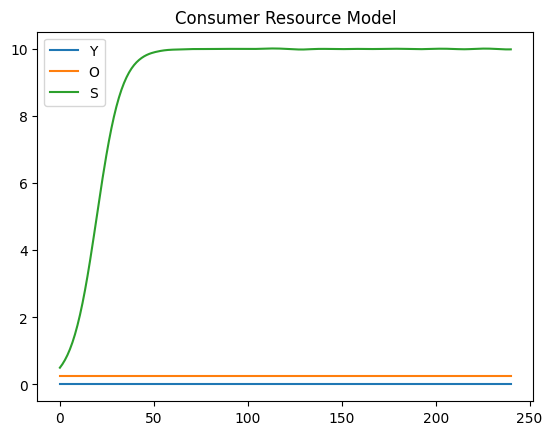

In [15]:
plt.plot(t_eval, sol.y[0, :], label='Y')
plt.plot(t_eval, sol.y[1, :], label='O')
plt.plot(t_eval, sol.y[2, :], label='S')
plt.title("Consumer Resource Model")
plt.legend()

plt.show()